<a href="https://colab.research.google.com/github/elangarka/Regularized-Xception-FER-Extra-Training-Data-Step-Decay-Learning-Rate/blob/main/Evaluate_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
data = pd.read_csv('fer+ck+augmentedfer.csv')
data.head()

# Process the third column to convert pixel strings to arrays
data['pixels'] = data[' pixels'].apply(lambda x: np.array(x.split(),
                                                          dtype=np.float32) / 255.0)

# Select the second column (index 1) as the splitter column
splitter_column = data.iloc[:, 1]

# Split the dataset based on the values in the second column
train_data = data[splitter_column == 'Training']
validation_data = data[splitter_column == 'PublicTest']
test_data = data[splitter_column == 'PrivateTest']

In [ ]:
# Preprocess the data
def preprocess_data(data):
    images = np.array(data['pixels'].tolist()).reshape(-1, 48, 48, 1)
    return images

X_train = preprocess_data(train_data)
X_validation = preprocess_data(validation_data)
X_test = preprocess_data(test_data)

y_train = to_categorical(train_data['emotion'], num_classes=7)
y_validation = to_categorical(validation_data['emotion'], num_classes=7)
y_test = to_categorical(test_data['emotion'], num_classes=7)

113/113 [==============================] - 48s 415ms/step


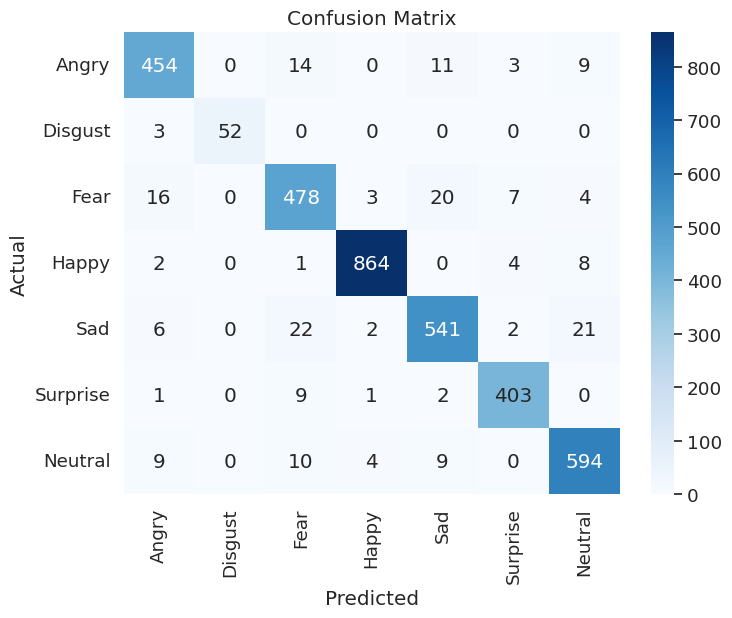

Classification Report:
              precision    recall  f1-score   support

       Angry       0.92      0.92      0.92       491
     Disgust       1.00      0.95      0.97        55
        Fear       0.90      0.91      0.90       528
       Happy       0.99      0.98      0.99       879
         Sad       0.93      0.91      0.92       594
    Surprise       0.96      0.97      0.97       416
     Neutral       0.93      0.95      0.94       626

    accuracy                           0.94      3589
   macro avg       0.95      0.94      0.94      3589
weighted avg       0.94      0.94      0.94      3589



In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your model from the .h5 file
model = tf.keras.models.load_model
 ('bestXceptionPlusData.h5')

# Make predictions with the model
predicted_probs = model.predict(X_test)
predicted_labels = np.argmax(predicted_probs, axis=1)\

# Create the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Define class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print('Classification Report:')
print(classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=class_names))



In [ ]:
best_model = load_model('bestXceptionPlusData.h5')
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

113/113 [==============================] - 40s 348ms/step - loss: 0.1663 - accuracy: 0.9434
Test Loss: 0.1663
Test Accuracy: 94.34%
